<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
#np.random.normal(loc=, scale=, size=)
#loc => mean
#scale => standard deviation

np.random.normal(loc=5, scale=2, size=10)

array([4.59323185, 4.74583058, 5.03705669, 7.95064786, 5.74813792,
       6.2233232 , 5.55289748, 7.83269406, 5.26947144, 4.77753235])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

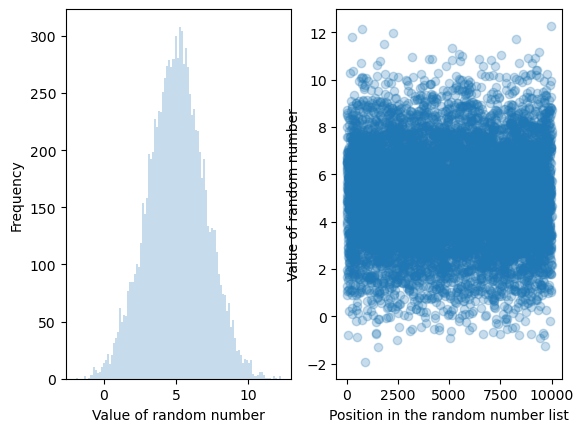

In [5]:
from matplotlib import pyplot as ply

#to visualise that above numbers are from Normal Distribution

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [8]:
#check if Normal random numbers satisfies 68% condition

n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 69.03%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [9]:
#left: q = 1-p.  
#right: p

### 1.2 The simulation

In [29]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [18]:
#tired of typing np.random. ==> shortform

import numpy.random as rnd #now just use rnd

NameError: name 'prob_right' is not defined

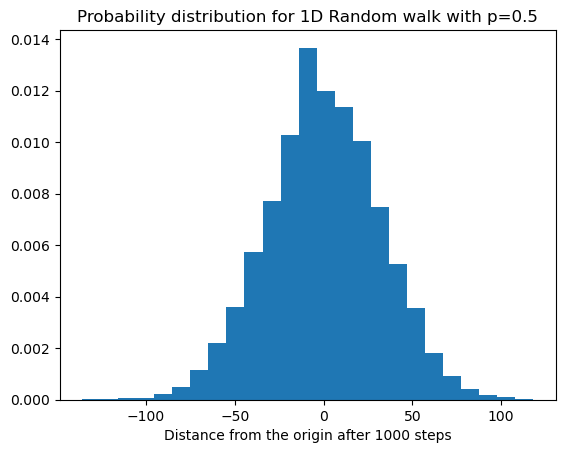

In [40]:
#PROBABILITY = 0.5

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)    #density=True to ask matplotlib to normalise area under curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')


Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

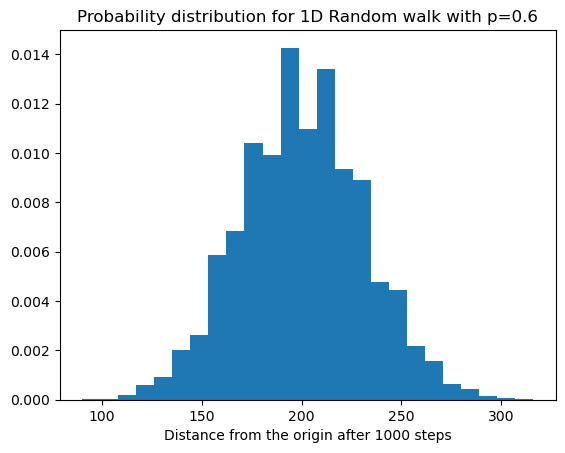

In [32]:
#PROBABILITY = 0.6

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)    #density=True to ask matplotlib to normalise area under curve to 1
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [39]:
#overlay normal distribution over previous plots to check if simulation agree theory

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output



NameError: name 'prob_right' is not defined

## 2 Estimating \(\pi\)

### 2.1 The method

In [ ]:

# Your code here


### 2.2 A poor but intuitive solution

In [ ]:
#throwing one grain at a time => slow (drawing numbers one at a time)


N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

### 2.3 A better solution

In [ ]:
#generate multiple random numbers at once

N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

### 2.4 A smarter solution

In [41]:
#same eqn if we limit experiment to just the first quadrant of the circle

#however, range of x and y becomes [0,1) => improves stats drastically
#can use faster,simpler rand()

N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.142076

## Exercise 1 :  Vital Stats of Random π

In [52]:
#1

def estimate_pi(n):
    
    x=rnd.rand(N_total)
    y=rnd.rand(N_total)
    N_green=np.sum((x**2+y**2) <= 1)

    return 4 * (N_green / N_total)


3.139748

In [58]:
#2

n=10000
no_of_times = 100

result = [estimate_pi(n) for _ in range(no_of_times)]

print(f'mean is {np.mean(result)} and standard deviation is {np.std(result)}')

mean is 3.14168612 and standard deviation is 0.0014863279266702951


In [ ]:
#3

